In [30]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt

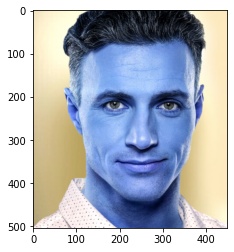

In [31]:
image = cv2.imread('Sample_image.jpg')
plt.imshow(image)

In [32]:
def cropping_image(image_path):
    face_cascade=cv2.CascadeClassifier('../opencv/haarcascades/haarcascade_frontalface_default.xml')
    eye_cascade=cv2.CascadeClassifier('../opencv/haarcascades/haarcascade_eye.xml')
    lst=[]
    img = cv2.imread(image_path)

    if img is None:
        return ('no image found')
    if img is not None:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray)
        print(len(faces),'Face Detected') 

        for (x,y,w,h) in faces:
            image_gray = gray[y:y+h, x:x+w]
            image_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(image_gray)
            if len(eyes) >= 2:
                lst.append(image_color)      
    return lst

1 Face Detected


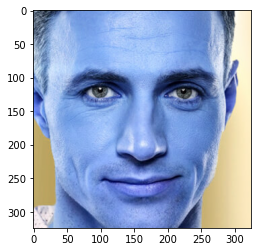

In [33]:
cropped_image = cropping_image('Sample_image.jpg')

for image in cropped_image:
    
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.show()

In [63]:
import os
path_to_data = "../../Data_collection/"
path_to_cr_data = "../Dataset/cropped/"
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [55]:
for entry in img_dirs[1:]:
    
    print(entry.split('/')[-1],len(os.listdir(entry)))
    

babarazam 446
kane_s_w 200
root66 539
steve_smith49 600
virat.kohli 600


All Players Folders have more than 440+ pictures (fetch from instagram) except kane_williomsons. So more pictures were collected from the google search using chrome extension.

In [64]:
for entry in img_dirs[1:]:
    
    print(entry.split('/')[-1],len(os.listdir(entry)))

babarazam 446
kane williamson - Google Search 301
kane_s_w 200
root66 539
steve_smith49 600
virat.kohli 600


Kane williamson now have two folder, One include pictures from instagram and one include pictures from google. So, have to merge those folders.

In [69]:
move_dir = img_dirs[2]
main_dir= img_dirs[3]

import shutil
def merge(move_dir, main_dir):
    files = next(os.walk(move_dir))[2]
    for file in files: # Copy the files
        move_file = move_dir + "/" + file
        main_file = main_dir + "/" + file
        if os.path.exists(main_file): # Delete the old files if already exist
            os.remove(main_file)
        shutil.move(move_file, main_file)
    os.removedirs(move_dir)
    
merge(move_dir,main_dir)

In [70]:
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
for entry in img_dirs[1:]:
    
    print(entry.split('/')[-1],len(os.listdir(entry)))

babarazam 446
kane_s_w 501
root66 539
steve_smith49 600
virat.kohli 600


Now, every folder have more than 440 pictures.

In [71]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [73]:

cropped_image_dirs = []
celebrity_file_names_dict = {}

count = 1
for img_dir in img_dirs:
    celebrity_name = img_dir.split('/')[-1]
    celebrity_name=''.join(e for e in celebrity_name if e.isalnum())
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_colors = cropping_image(entry.path)
        if roi_colors is not None:
            for roi_color in roi_colors:
                cropped_folder = path_to_cr_data + celebrity_name
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print("Generating cropped images in folder: ",cropped_folder)
                cropped_file_name = celebrity_name + str(count) + ".jpg"
                cropped_file_path = cropped_folder + "/" + cropped_file_name
                try:
                    cv2.imwrite(cropped_file_path, roi_color)
                except:
                    pass
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count += 1

5 Face Detected
Generating cropped images in folder:  ../Dataset/cropped/babarazam
4 Face Detected
9 Face Detected
7 Face Detected
2 Face Detected
1 Face Detected
3 Face Detected
4 Face Detected
4 Face Detected
3 Face Detected
4 Face Detected
8 Face Detected
1 Face Detected
1 Face Detected
10 Face Detected
6 Face Detected
4 Face Detected
5 Face Detected
6 Face Detected
1 Face Detected
2 Face Detected
2 Face Detected
4 Face Detected
7 Face Detected
4 Face Detected
2 Face Detected
0 Face Detected
3 Face Detected
7 Face Detected
3 Face Detected
2 Face Detected
10 Face Detected
2 Face Detected
5 Face Detected
1 Face Detected
2 Face Detected
7 Face Detected
1 Face Detected
1 Face Detected
2 Face Detected
11 Face Detected
5 Face Detected
7 Face Detected
2 Face Detected
4 Face Detected
2 Face Detected
1 Face Detected
4 Face Detected
2 Face Detected
2 Face Detected
2 Face Detected
0 Face Detected
1 Face Detected
5 Face Detected
2 Face Detected
4 Face Detected
4 Face Detected
18 Face Detected
7

0 Face Detected
14 Face Detected
4 Face Detected
0 Face Detected
4 Face Detected
1 Face Detected
1 Face Detected
0 Face Detected
0 Face Detected
5 Face Detected
5 Face Detected
0 Face Detected
3 Face Detected
3 Face Detected
3 Face Detected
13 Face Detected
2 Face Detected
0 Face Detected
34 Face Detected
0 Face Detected
3 Face Detected
18 Face Detected
5 Face Detected
0 Face Detected
2 Face Detected
1 Face Detected
2 Face Detected
6 Face Detected
5 Face Detected
0 Face Detected
1 Face Detected
1 Face Detected
7 Face Detected
0 Face Detected
2 Face Detected
1 Face Detected
2 Face Detected
2 Face Detected
1 Face Detected
1 Face Detected
2 Face Detected
3 Face Detected
0 Face Detected
3 Face Detected
1 Face Detected
1 Face Detected
6 Face Detected
4 Face Detected
3 Face Detected
2 Face Detected
29 Face Detected
5 Face Detected
2 Face Detected
6 Face Detected
0 Face Detected
4 Face Detected
2 Face Detected
2 Face Detected
2 Face Detected
28 Face Detected
12 Face Detected
0 Face Detected
3

2 Face Detected
3 Face Detected
1 Face Detected
0 Face Detected
0 Face Detected
0 Face Detected
3 Face Detected
2 Face Detected
0 Face Detected
1 Face Detected
1 Face Detected
0 Face Detected
0 Face Detected
3 Face Detected
2 Face Detected
2 Face Detected
0 Face Detected
1 Face Detected
1 Face Detected
0 Face Detected
1 Face Detected
0 Face Detected
0 Face Detected
0 Face Detected
1 Face Detected
0 Face Detected
0 Face Detected
0 Face Detected
0 Face Detected
0 Face Detected
4 Face Detected
0 Face Detected
2 Face Detected
1 Face Detected
1 Face Detected
7 Face Detected
1 Face Detected
0 Face Detected
0 Face Detected
1 Face Detected
0 Face Detected
1 Face Detected
0 Face Detected
1 Face Detected
2 Face Detected
2 Face Detected
4 Face Detected
0 Face Detected
0 Face Detected
0 Face Detected
3 Face Detected
0 Face Detected
0 Face Detected
0 Face Detected
2 Face Detected
2 Face Detected
0 Face Detected
1 Face Detected
8 Face Detected
1 Face Detected
0 Face Detected
2 Face Detected
2 Face D

3 Face Detected
0 Face Detected
2 Face Detected
1 Face Detected
2 Face Detected
4 Face Detected
0 Face Detected
2 Face Detected
3 Face Detected
5 Face Detected
6 Face Detected
7 Face Detected
3 Face Detected
2 Face Detected
4 Face Detected
3 Face Detected
0 Face Detected
2 Face Detected
1 Face Detected
4 Face Detected
1 Face Detected
2 Face Detected
0 Face Detected
0 Face Detected
0 Face Detected
1 Face Detected
4 Face Detected
1 Face Detected
11 Face Detected
3 Face Detected
1 Face Detected
4 Face Detected
15 Face Detected
14 Face Detected
1 Face Detected
3 Face Detected
3 Face Detected
6 Face Detected
0 Face Detected
3 Face Detected
5 Face Detected
3 Face Detected
1 Face Detected
1 Face Detected
3 Face Detected
3 Face Detected
2 Face Detected
1 Face Detected
8 Face Detected
6 Face Detected
0 Face Detected
2 Face Detected
0 Face Detected
1 Face Detected
16 Face Detected
1 Face Detected
2 Face Detected
13 Face Detected
7 Face Detected
1 Face Detected
1 Face Detected
11 Face Detected
1 

1 Face Detected
1 Face Detected
8 Face Detected
15 Face Detected
4 Face Detected
2 Face Detected
0 Face Detected
2 Face Detected
3 Face Detected
3 Face Detected
5 Face Detected
2 Face Detected
1 Face Detected
2 Face Detected
2 Face Detected
1 Face Detected
1 Face Detected
1 Face Detected
4 Face Detected
3 Face Detected
3 Face Detected
6 Face Detected
2 Face Detected
4 Face Detected
3 Face Detected
4 Face Detected
0 Face Detected
2 Face Detected
1 Face Detected
0 Face Detected
4 Face Detected
1 Face Detected
5 Face Detected
2 Face Detected
6 Face Detected
1 Face Detected
2 Face Detected
4 Face Detected
3 Face Detected
4 Face Detected
0 Face Detected
1 Face Detected
0 Face Detected
0 Face Detected
10 Face Detected
8 Face Detected
33 Face Detected
2 Face Detected
2 Face Detected
1 Face Detected
3 Face Detected
7 Face Detected
5 Face Detected
4 Face Detected
Generating cropped images in folder:  ../Dataset/cropped/viratkohli
1 Face Detected
3 Face Detected
4 Face Detected
5 Face Detected
2

2 Face Detected
0 Face Detected
0 Face Detected
1 Face Detected
1 Face Detected
1 Face Detected
1 Face Detected
1 Face Detected
0 Face Detected
1 Face Detected
0 Face Detected
0 Face Detected
4 Face Detected
5 Face Detected
1 Face Detected
2 Face Detected
3 Face Detected
10 Face Detected
9 Face Detected
3 Face Detected
1 Face Detected
1 Face Detected
1 Face Detected
3 Face Detected
3 Face Detected
1 Face Detected
1 Face Detected
1 Face Detected
8 Face Detected
3 Face Detected
0 Face Detected
1 Face Detected
3 Face Detected
4 Face Detected
7 Face Detected
7 Face Detected
0 Face Detected
1 Face Detected
0 Face Detected
2 Face Detected
2 Face Detected
1 Face Detected
1 Face Detected
0 Face Detected
3 Face Detected
1 Face Detected
2 Face Detected
6 Face Detected
2 Face Detected
2 Face Detected
0 Face Detected
0 Face Detected
1 Face Detected
1 Face Detected
1 Face Detected
0 Face Detected
5 Face Detected
1 Face Detected
0 Face Detected
0 Face Detected
2 Face Detected
1 Face Detected
3 Face 

All the faces are detected but all images are collected from social media and internet. So there will be some unwanted faces and those faces have to be deleted manually.
After maually deleting unwanted faces, directory look like

"Fab five\Model\Dataset\data_after_manual_selection"

../Dataset/cropped\kanesw
../Dataset/cropped\kanewilliamsonGoogleSearch


In [10]:
# https://stackoverflow.com/questions/24536552/how-to-combine-pywavelet-and-opencv-for-image-processing

import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [5]:
import os
path_to_data = "../Dataset/data_after_manual_selection/"
img_dirs = []
class_dict={}
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
count = 0
for profile in img_dirs:
    class_dict[profile.split('/')[-1]] = count
    count = count + 1
class_dict

{'babarazam': 0,
 'kane_s_w': 1,
 'root66': 2,
 'steve_smith49': 3,
 'viratkohli': 4}

In [7]:
celebrity_file_names_dict={}

for profile in img_dirs:
    celebrity_file_names_dict[profile]=os.listdir(profile)

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import cv2
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(celebrity_name+'/'+training_image)

        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name.split('/')[-1]]) 

In [15]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(535, 4096)

In [16]:
import pandas as pd
df = pd.DataFrame(y)
df[0].value_counts()

3    137
0    120
4    104
1    102
2     72
Name: 0, dtype: int64

In [17]:
%store X

Stored 'X' (ndarray)


In [18]:
%store y

Stored 'y' (list)


In [19]:
%store class_dict

Stored 'class_dict' (dict)
